**With the following data analysis, I'll be attempting to find the insights about various dog breed behaviour based on their size, intelligence, socialibilty.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_info = pd.read_csv("/content/sample_data/AKCBreedInfo.csv").drop('index',axis=1)
df_main = pd.read_csv("/content/sample_data/dog_intelligence.csv").drop('index',axis=1)
df_genre = pd.read_csv("/content/sample_data/best_in_show.csv")

df=df_main.merge(df_info,how='inner',on='Breed')
df=df.merge(df_genre[['Dog breed','category']],how='inner',left_on='Breed',right_on='Dog breed')
df.set_index('Breed',inplace=True)

def size(avg_we):
  size=''
  if avg_we>40:
    size='Large'
  elif(avg_we>=25):
    size='Medium'
  else:
    size='Small'
  return size

#Value imputation of nulls for lowest degree
df.drop(["Alaskan Malamute"], inplace = True)
df['obey'] = df['obey'].fillna('10%')
df['AvgReps'] = (df['reps_lower']+df['reps_upper'])/2
df['AvgHeight'] = 0.5*(df['height_low_inches'].astype(float) + df['height_high_inches'].astype(float))
df['AvgWeight'] = 0.5*(df['weight_low_lbs'].astype(float) + df['weight_high_lbs'].astype(float))
df['height_low_inches'] = df['height_low_inches'].astype(float)
df['height_high_inches'] = df['height_high_inches'].astype(float)
df['weight_low_lbs'] = df['weight_low_lbs'].astype(float)
df['weight_high_lbs'] = df['weight_high_lbs'].astype(float)
df['obey'] = df['obey'].apply(lambda x: int(x.replace('%','')))
df['Size']= df['AvgWeight'].apply(size)
df.info()
df.describe()
df.describe(include=object)

**After Data Cleaning, Transformation and Imputations I'll be performing the data analysis of the final dataset df.**

**Exploratory Data Analysis:**
- AckBreedInfo had 149 data points and dog_intelligence had 135 data points.
- After data processing we are left with 104 data points to perform our analysis on.
- I used an external database to know which category each of 104 breed belongs to. Source:https://www.kaggle.com/datasets/paultimothymooney/best-in-show-data-about-dogs

**Observations about dataset df:**

There are** 3 categorical attributes**:
- **Classification** : It categorizes breed based on the probability of obeying. There are 6 classification.
- **Category** : It categorizes the breeds based on what they are used for. For Eg: Toy dog, Working Dog Etc.
- **Size**: Based on weight we have divided dogs as follows:
  - Average weight > 40 lbs          - Large
  - 20 lbs < Average weight < 40 lbs - Medium
  - Average weight < 20 lbs          - Small

# **Insight:**

There is inverse Corelation between **Average reps to understand new command** and **probability of obeying**.
We can infer that **higher intelligence** means **lower average reps** to learn a command and **high obey value**.

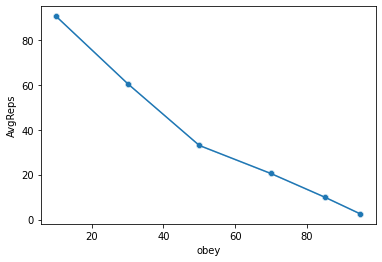

,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,AvgReps,AvgHeight,AvgWeight
obey,1.000000,-0.945471,-0.969888,0.116006,0.162126,-0.002912,-0.000725,-0.971769,0.142472,-0.001676
reps_lower,-0.945471,1.000000,0.948883,-0.072876,-0.123118,0.057455,0.042645,0.982815,-0.101174,0.049454
reps_upper,-0.969888,0.948883,1.000000,-0.144417,-0.182886,-0.010797,-0.015814,0.990840,-0.166967,-0.013802
height_low_inches,0.116006,-0.072876,-0.144417,1.000000,0.960427,0.736889,0.729675,-0.115643,0.988249,0.739907
height_high_inches,0.162126,-0.123118,-0.182886,0.960427,1.000000,0.657206,0.655051,-0.159638,0.991715,0.662371
weight_low_lbs,-0.002912,0.057455,-0.010797,0.736889,0.657206,1.000000,0.960718,0.018268,0.700504,0.987047
weight_high_lbs,-0.000725,0.042645,-0.015814,0.729675,0.655051,0.960718,1.000000,0.008997,0.695995,0.992798
AvgReps,-0.971769,0.982815,0.990840,-0.115643,-0.159638,0.018268,0.008997,1.000000,-0.140939,0.013087
AvgHeight,0.142472,-0.101174,-0.166967,0.988249,0.991715,0.700504,0.695995,-0.140939,1.000000,0.704731
AvgWeight,-0.001676,0.049454,-0.013802,0.739907,0.662371,0.987047,0.992798,0.013087,0.704731,1.000000


In [ ]:
sns.scatterplot(x= 'obey', y= 'AvgReps', data = df)
sns.lineplot(x='obey', y='AvgReps', data=df)
plt.show()
df.corr()


# **Insight:**
In the given dataset
 - Large Breed - 57
 - Small Breed - 32
 - Medium Breed - 15

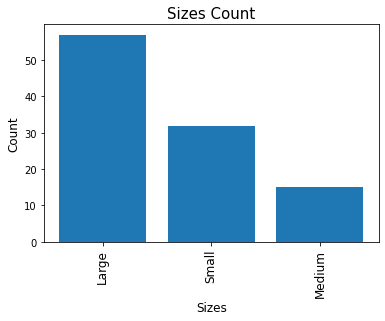

,Size,Count
0,Large,57
1,Small,32
2,Medium,15


In [ ]:
size_count = pd.DataFrame(df['Size'].value_counts()).reset_index()
size_count.rename(columns={'index':'Size','Size':'Count'}, inplace=True)
plt.title('Sizes Count',fontsize=15)
y_bar = size_count['Size']
x_bar = size_count['Count']
plt.bar(y_bar,x_bar)
plt.xlabel('Sizes',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.show()
size_count

**Obey probilities for vaious classification:**

Brightest Dogs  :   95

Excellent Working Dogs : 85

Above Average Working Dogs :	70

Average Working/Obedience Intelligence : 50

Fair Working/Obedience Intelligence : 30

Lowest Degree of Working/Obedience Intelligence : 10


What is the probabilty that a **large dog has obey > 50** i.e Large dogs are either in catergory of Bright Dogs or Excellent Working Dogs or Above Average Working Dogs? 49.12%

**Conditional Probability: P(obey>50 | Large Dog)** : **49.12%**

In [ ]:
len(df[(df['obey']>50)&(df['Size']=='Large')])/len(df[df['Size']=='Large'])
len(df[(df['obey']>50)&(df['Size']=='Medium')])/len(df[df['Size']=='Medium'])
len(df[(df['obey']>50)&(df['Size']=='Small')])/len(df[df['Size']=='Small'])

0.28125

Similarly, what is the probabilty that a **Medium and Small dog has obey > 50** ?

**Conditional Probability: P(obey>50 | Medium Dog)**: **53.33%**

**Conditional Probability: P(obey>50 | Small Dog)**: **28.12%**

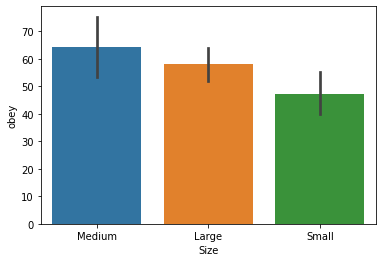

In [ ]:
sns.barplot(data=df, x="Size", y="obey", estimator=np.mean)
plt.show()#Mean obey/intelligence values of breeds.

**Small Breed** has higher spread but mean is below 50 and conditional probabilty calculations shows that smaller breeds are less likely to be intelligent**(only 28% chances)** and **needs more avg reps** to learn new commands.

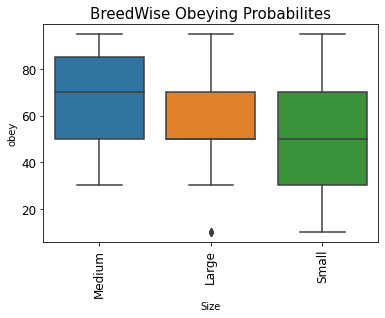

In [ ]:
sns.boxplot(x='Size', y='obey', data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('BreedWise Obeying Probabilites', fontsize=15)
plt.show()

**Top Utilities of Large Dogs:**
- Sporting
- Working
- Hound


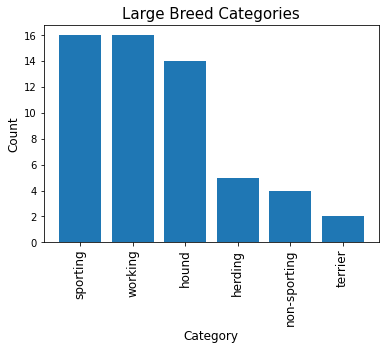

In [ ]:
large_dogs = df[df['Size']=='Large']
category_count = pd.DataFrame(large_dogs['category'].value_counts()).reset_index()
category_count.rename(columns={'index':'category','category':'Count'}, inplace=True)
plt.title('Large Breed Categories',fontsize=15)
y_bar = category_count['category']
x_bar = category_count['Count']
plt.bar(y_bar,x_bar)
plt.xlabel('Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.show()


**Top Utilities of Small Dogs:**
- Toy
- Terrier

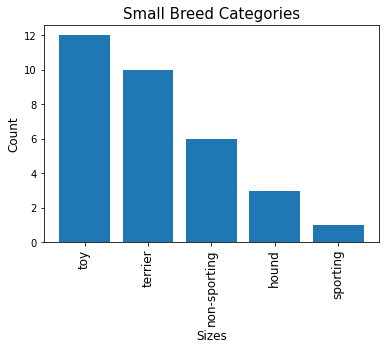

In [ ]:
small_dogs = df[df['Size']=='Small']
category_count = pd.DataFrame(small_dogs['category'].value_counts()).reset_index()
category_count.rename(columns={'index':'category','category':'Count'}, inplace=True)
plt.title('Small Breed Categories',fontsize=15)
y_bar = category_count['category']
x_bar = category_count['Count']
plt.bar(y_bar,x_bar)
plt.xlabel('Sizes',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.show()

**Top Utilities of Medium Dogs:**
- Herding
- Sporting

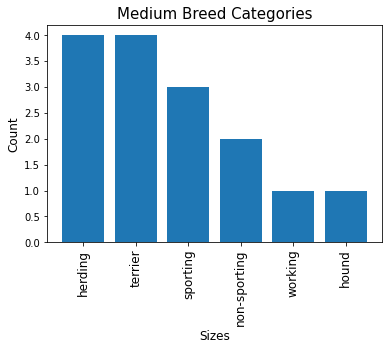

In [ ]:
medium_dogs = df[df['Size']=='Medium']
category_count = pd.DataFrame(medium_dogs['category'].value_counts()).reset_index()
category_count.rename(columns={'index':'category','category':'Count'}, inplace=True)
plt.title('Medium Breed Categories',fontsize=15)
y_bar = category_count['category']
x_bar = category_count['Count']
plt.bar(y_bar,x_bar)
plt.xlabel('Sizes',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.show()

# **Based on Analysis of dataset, I have following insights and suggestions:**

- Our analysis is based on the finding, that **more the number of average reps required for a breed to learn a new command, less obidient/intelligent it is.**

- **Classification of breeds** - Large, Medium, Small is done based on **widely accepted criteria of average weight** in lbs.

- In the given dataset:
 - Large Breed - 57
 - Small Breed - 32
 - Medium Breed - 15

- **Obey probilities for vaious classification:**

  - **Brightest Dogs** : 95% - 2.5 avg reps

  - **Excellent Working Dogs** : 85% - 10 avg reps

  - **Above Average Working Dogs** : 70% - 20.5 avg reps

  - **Average Working/Obedience Intelligence** : 50% - 33 avg reps

  - **Fair Working/Obedience Intelligence** : 30% - 60.5 avg reps

  - **Lowest Degree of Working/Obedience Intelligence** : 10% - 90.5 avg reps


- Given that the **breed you are intrested** in is **large or medium**, there is **almost 50% chance** that it's obey probability is between **70-95%**. They will be **easy to train**.

  - Since there top utlilities for large are **Sporting, Working, Hound**, they are really **energetic, athletic, active and alert**.
They'll require **good high energy diet, physical activity**.

- Close to large breed category comes **medium sized**. They are more **service and utility oriented like herding, service dogs, sniffing, police dogs, protection etc.**
  - Recommended for people who have **time and energy for hikes, walks, daily outside playtime**.
  - Herding dogs make great **family companion** and are protective of family.

- **Small breeds** have only **28% chance** of being **obidient more than 50%**.
  - Their main utilities include **toy dogs, terrier**.
  -Their **energy and food requirements are less** than above 2 categories.
  -They need more reps to teach **so patience and various teaching methods will be required**.
  - Even there might be some **need of dog trainer**.
  - Since they are not much outdoor dogs they **need extra safety outside**.
  - They might be **prone to heat and cold and disease** as they **don't have much exposure**, so there might be need for **more medical resources like checkups and medicines.**
  - Recommended for people who **do not have much time for outdoor activities** and want a breed thats **playful and good to look at companion** or **have a small house.**